# Bank Note Analysis


Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.



Attribute Information:

>>   **1)variance of Wavelet Transformed image (continuous)**

>>   **2)skewness of Wavelet Transformed image (continuous)**

>>   **3)curtosis of Wavelet Transformed image (continuous)**

>>   **4)entropy of image (continuous)**

>>   **5)class (integer)**

**Dataset: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data**

**UCI: http://archive.ics.uci.edu/ml/datasets/banknote+authentication**



**Can we classify banknote as fake or genuine?**

In [1]:
!pip install pyforest
from pyforest import*
lazy_imports()

Processing ./.cache/pip/wheels/72/b6/6c/b593d021f7e83f481c5208bc23df0084bcfbeb5b141352b882/pyforest-1.0.3-py2.py3-none-any.whl


['import plotly.graph_objs as go',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import os',
 'from sklearn.preprocessing import OneHotEncoder',
 'import sys',
 'import keras',
 'import numpy as np',
 'from pyspark import SparkContext',
 'import altair as alt',
 'import tqdm',
 'from openpyxl import load_workbook',
 'import awswrangler as wr',
 'from sklearn.manifold import TSNE',
 'import xgboost as xgb',
 'import lightgbm as lgb',
 'import datetime as dt',
 'from sklearn.model_selection import train_test_split',
 'import plotly.express as px',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import dash',
 'import pickle',
 'import bokeh',
 'import sklearn',
 'import glob',
 'import pydot',
 'import gensim',
 'import nltk',
 'from sklearn import svm',
 'from sklearn.ensemble import RandomForestRegressor',
 'import statistics',
 'import tensorflow as tf',
 'import matplotlib.pyplot as plt',
 'i

In [2]:
df=pd.read_csv('BankNote_Authentication.csv')   

<IPython.core.display.Javascript object>

In [3]:
df.head()

variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

In [4]:
df.shape

(1372, 5)

In [5]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [6]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

# EDA

**Visualizations**


**Univariate Data Analysis**

In [8]:
plt.figure(figsize=(10,7))
plt.title('Distribution of "Class" Attribute')

sns.distplot(df['class'],color='red')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Multivariate Data Analysis**

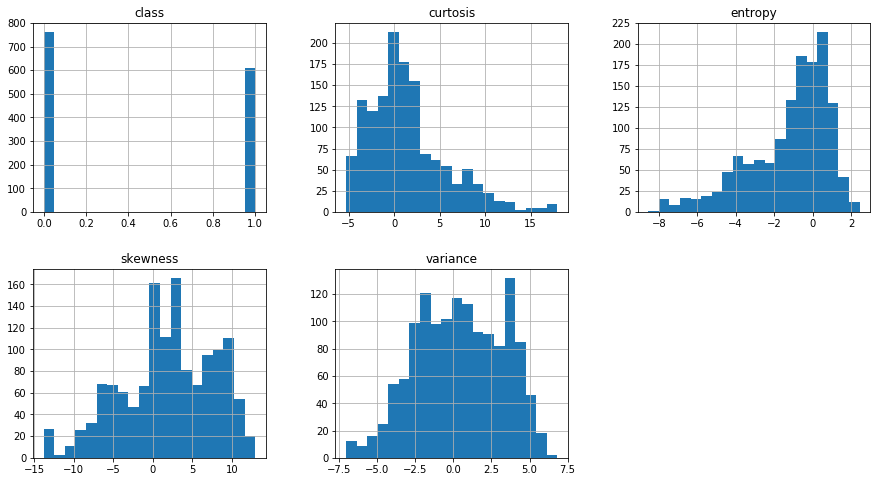

In [9]:
df.hist(bins=20, figsize=(15,8),layout=(2,3)); #Histogram of all the attributes

**kde plot**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

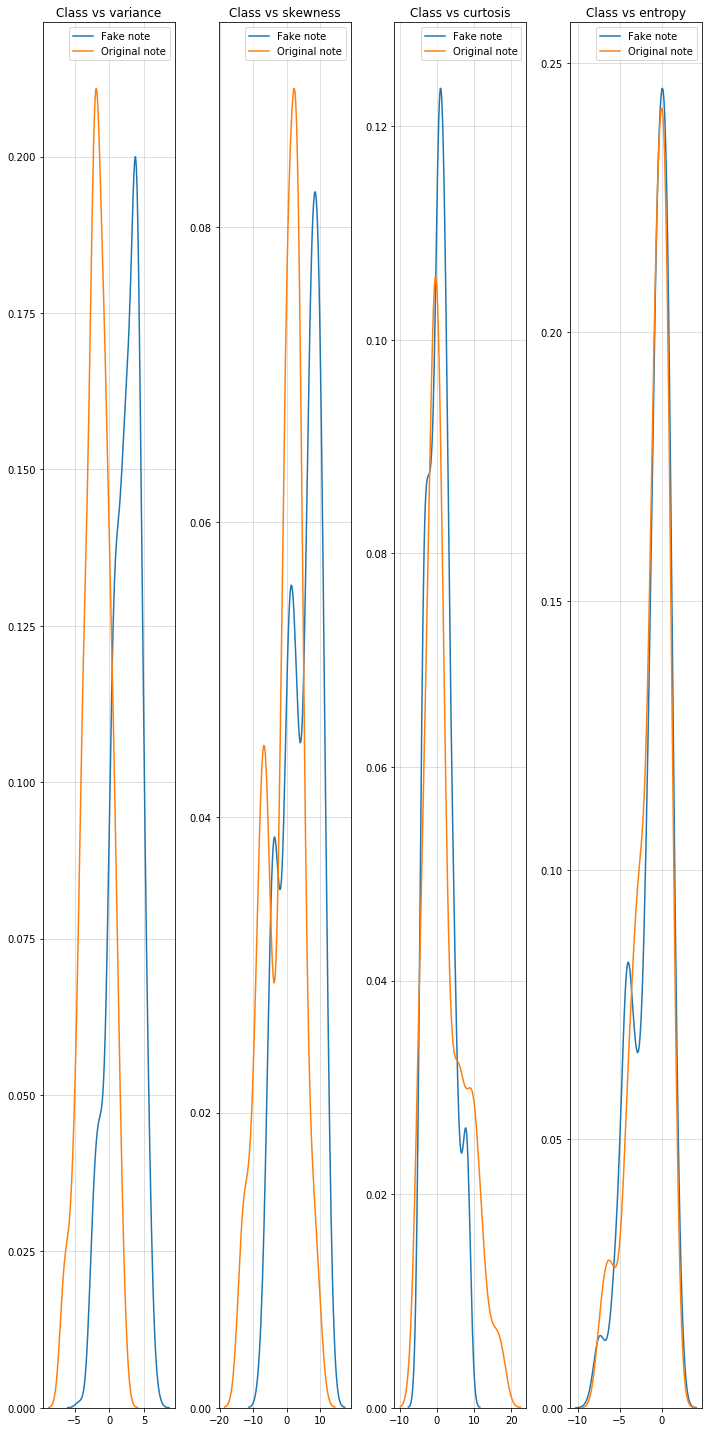

In [10]:
col_names = df.drop('class', axis = 1).columns.tolist()

plt.figure(figsize = (10,20))
i = 0
for col in col_names:
     plt.subplot(1,4,i+1)
     plt.grid(True, alpha =0.5)
     sns.kdeplot(df[col][df['class'] ==0], label = 'Fake note')
     sns.kdeplot(df[col][df['class'] ==1], label = 'Original note')
     plt.title('Class vs ' + col)
     plt.tight_layout()
     i+=1
plt.show()

In [11]:
import warnings

warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

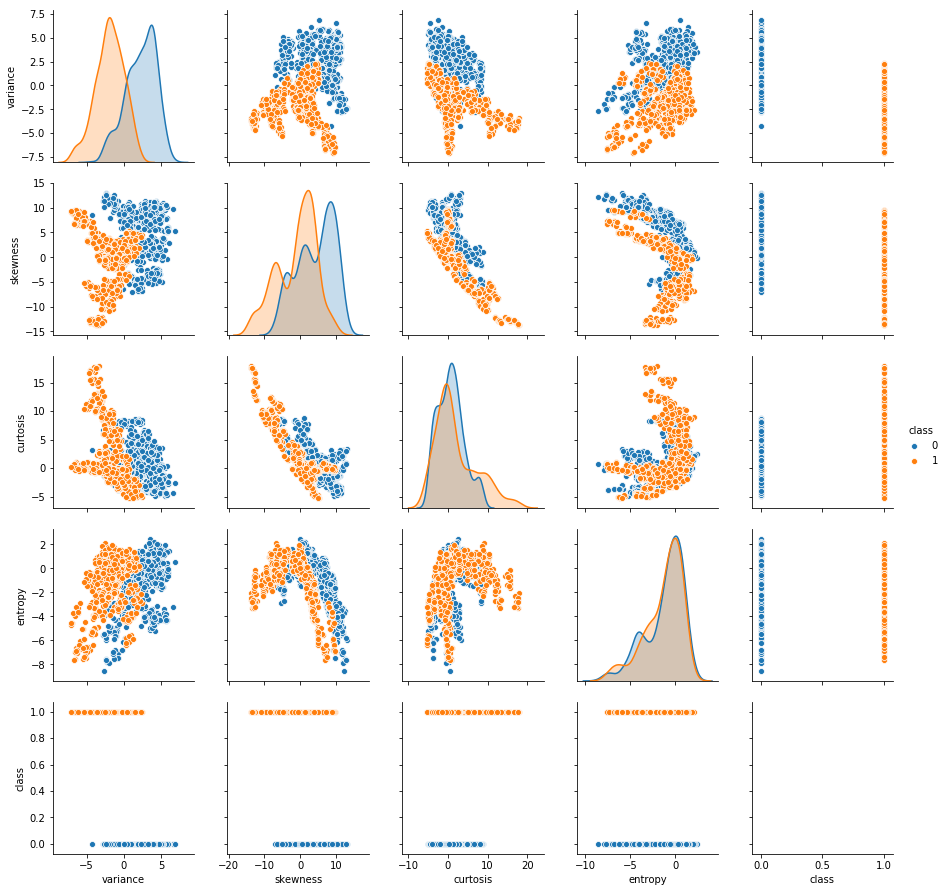

In [12]:
sns.pairplot(df, hue="class")

# Preparing Our Data To Build Our Model

In [13]:
#defining features and target variable
X = df.drop(['class'],axis=1) 
y = df['class']

In [14]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Scalling our data

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train


array([[ 0.10527877, -0.27983064,  0.2259937 ,  0.78802844],
       [-0.99840564, -1.18889897,  1.31324557,  0.52830217],
       [-0.4363023 , -0.32105208, -0.31909545,  0.38825872],
       ...,
       [-1.71754187,  0.71675177, -0.17167062, -2.05109895],
       [ 0.57142352,  0.01090731,  0.22034811,  0.51719724],
       [-0.98516431,  0.29693578, -0.48180637, -0.03803285]])

In [17]:
y_train.shape

(960,)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

classifier=LogisticRegression(solver='liblinear',random_state=1)
classifier.fit(X_train,y_train)

accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10) # CV: Determines the cross-validation splitting strategy (How many folds, default is 5-folds) Evaluate a score by cross-validation. estimator: object to use to fit the data.
print("Accuracies:\n",accuracies)

y_test_pred=classifier.predict(X_test)


print("Mean Accuracy: ",accuracies.mean())

Accuracies:
 [0.97916667 0.98958333 0.98958333 0.98958333 0.97916667 0.95833333
 1.         0.97916667 0.97916667 0.97916667]
Mean Accuracy:  0.9822916666666666


In [19]:
accuracy_score(y_test,y_test_pred)

0.9781553398058253

Confusion Matrix For Logistic Regression


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

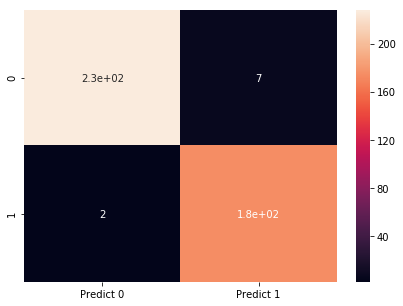

In [20]:
from sklearn import metrics

print("Confusion Matrix For Logistic Regression")
cm=metrics.confusion_matrix(y_test, y_test_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# Support Vector Machine

In [21]:
from sklearn.svm import SVC

svm_classifier=SVC(kernel='linear')
svm_classifier.fit(X_train,y_train)

svm_accuracies=cross_val_score(estimator=svm_classifier,X=X_train,y=y_train,cv=10)
print("Accuracies:\n",svm_accuracies)

Accuracies:
 [0.97916667 1.         0.98958333 0.98958333 0.97916667 0.95833333
 1.         0.97916667 0.97916667 0.98958333]


In [22]:
svm_pred=svm_classifier.predict(X_test)

print("Mean Accuracy: ",svm_accuracies.mean())

Mean Accuracy:  0.984375


In [23]:
accuracy_score(y_test,svm_pred)

0.9878640776699029

Confusion Matrix For svm_pred


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

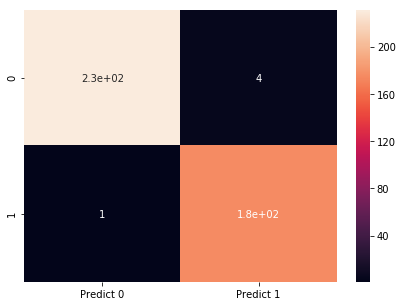

In [24]:
print("Confusion Matrix For svm_pred")
cm=metrics.confusion_matrix(y_test,svm_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# Support Vector Machine (rbf)
**Kernels in SVM classification refer to the function that is responsible for defining the decision boundaries between the classes. Apart from the classic linear kernel which assumes that the different classes are separated by a straight line, a RBF (radial basis function) kernel is used when the boundaries are hypothesized to be curve-shaped.**

**RBF kernel uses two main parameters, gamma and C that are related to:**

**>1)the decision region (how spread the region is), and**

**>2)the penalty for misclassifying a data point
respectively**

In [25]:
from sklearn.svm import SVC

svm_rbf_classifier=SVC(kernel='rbf',gamma='auto')
svm_rbf_classifier.fit(X_train,y_train)

svm_rbf_accuracies=cross_val_score(estimator=svm_rbf_classifier,X=X_test,y=y_test,cv=10)
print("Accuracies:\n",svm_rbf_accuracies)
print("Mean Accuracy: ",svm_rbf_accuracies.mean())

Accuracies:
 [1.         1.         1.         1.         0.97560976 1.
 1.         1.         1.         1.        ]
Mean Accuracy:  0.9975609756097562


In [26]:
svm_rbf_pred=svm_rbf_classifier.predict(X_test)

accuracy_score(y_test,svm_rbf_pred)

1.0

Confusion Matrix For svm_rbf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

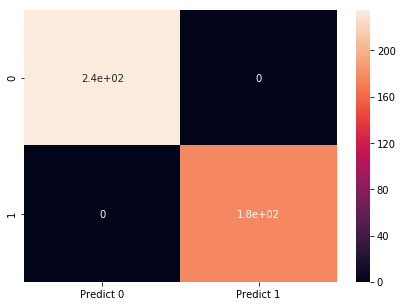

In [27]:
print("Confusion Matrix For svm_rbf")
cm=metrics.confusion_matrix(y_test,svm_rbf_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rdf_classifier=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
rdf_classifier.fit(X_train,y_train)
rdf_accuracies=cross_val_score(estimator=rdf_classifier,X=X_test,y=y_test,cv=10)
 
print("Accuracies:\n",rdf_accuracies)
print("Mean Accuracy: ",rdf_accuracies.mean())

Accuracies:
 [1.         0.9047619  0.97560976 1.         1.         0.97560976
 0.97560976 0.97560976 0.97560976 1.        ]
Mean Accuracy:  0.9782810685249711


In [29]:
rdf_pred=rdf_classifier.predict(X_test)

accuracy_score(y_test,rdf_pred)

0.9951456310679612

Confusion Matrix For Random Forest


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

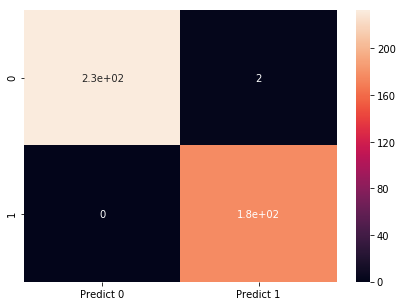

In [30]:
print("Confusion Matrix For Random Forest")
cm=metrics.confusion_matrix(y_test,rdf_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# KNeighborsClassifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {
    'leaf_size' : [2,5,7,9,11],
    'n_neighbors' : [2,5,7,9,11],
    'p' : [1,2]    
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 2}

In [33]:
final_KNN_Model = grid.best_estimator_

In [34]:
KNN = KNeighborsClassifier(n_neighbors=2,p=1,leaf_size=2 )

In [35]:
# Call Nearest Neighbour algorithm

KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')

In [36]:
KNN_predicted = KNN.predict(X_test)

accuracy_score(y_test,KNN_predicted)

0.9975728155339806

Confusion Matrix For KNN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

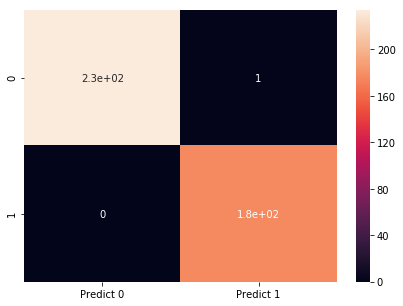

In [37]:
print("Confusion Matrix For KNN")
cm=metrics.confusion_matrix(y_test,KNN_predicted, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# Multilayer Perceptron
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [38]:
from sklearn.neural_network import MLPClassifier
multi_classifier=MLPClassifier(hidden_layer_sizes=(8,4), max_iter=8000, alpha=0.0001, solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
multi_classifier.fit(X_train,y_train)
multi_accuracies=cross_val_score(estimator=multi_classifier,X=X_test,y=y_test,cv=10)

Iteration 1, loss = 1.01823737
Iteration 2, loss = 1.00421290
Iteration 3, loss = 0.98458755
Iteration 4, loss = 0.96179042
Iteration 5, loss = 0.93890995
Iteration 6, loss = 0.91685273
Iteration 7, loss = 0.89507491
Iteration 8, loss = 0.87484816
Iteration 9, loss = 0.85672873
Iteration 10, loss = 0.83868772
Iteration 11, loss = 0.82208609
Iteration 12, loss = 0.80674298
Iteration 13, loss = 0.79307337
Iteration 14, loss = 0.77979093
Iteration 15, loss = 0.76785994
Iteration 16, loss = 0.75612230
Iteration 17, loss = 0.74558580
Iteration 18, loss = 0.73551547
Iteration 19, loss = 0.72590875
Iteration 20, loss = 0.71672310
Iteration 21, loss = 0.70811932
Iteration 22, loss = 0.69948299
Iteration 23, loss = 0.69165575
Iteration 24, loss = 0.68374710
Iteration 25, loss = 0.67626052
Iteration 26, loss = 0.66862967
Iteration 27, loss = 0.66155657
Iteration 28, loss = 0.65441647
Iteration 29, loss = 0.64743669
Iteration 30, loss = 0.64070120
Iteration 31, loss = 0.63404590
Iteration 32, los

In [39]:
print("Accuracies:\n",multi_accuracies)
print("Mean Accuracy: ",multi_accuracies.mean())

Accuracies:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy:  1.0


In [40]:
multi_predicted = multi_classifier.predict(X_test)

In [41]:
accuracy_score(y_test,multi_predicted)

1.0

Confusion Matrix For MLPClassifier


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

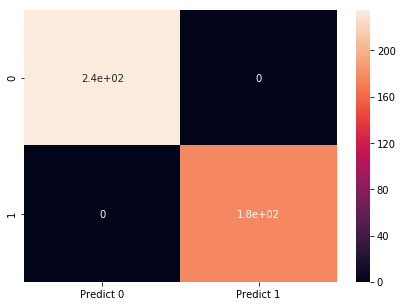

In [42]:
print("Confusion Matrix For MLPClassifier")
cm=metrics.confusion_matrix(y_test,multi_predicted, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [0,1]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# Printing each Algorithm and the accuracy score

In [43]:
print("LogisticRegression:", accuracy_score(y_test,y_test_pred))
print("Support Vector Machine (using kernel=linear):", accuracy_score(y_test,svm_pred))
print("Support Vector Machine (using kernel=rbf):", accuracy_score(y_test,svm_rbf_pred))
print("RandomForestClassifier:", accuracy_score(y_test,rdf_pred))
print("KNeighborsClassifier:", accuracy_score(y_test,KNN_predicted))
print("MLPClassifier:", accuracy_score(y_test,multi_predicted))

LogisticRegression: 0.9781553398058253
Support Vector Machine (using kernel=linear): 0.9878640776699029
Support Vector Machine (using kernel=rbf): 1.0
RandomForestClassifier: 0.9951456310679612
KNeighborsClassifier: 0.9975728155339806
MLPClassifier: 1.0


It can be seen that Support Vector Machine (using kernel=rbf), and MLPClassifier: 1.0 are having highest accuracy score of 100% and RandomForestClassifier, KNeighborsClassifier are also doing a very great job with an accuracy score of 99%.

These can also be verified from the confusion matrix that SupportVector Machine, MLPClassifier could make 100 per cent accurate predictions to classify whether a banknote is fake or genuine.
Though the Accuracy of 100% is quite weird, it depends upon the complexity dataset.

logistic regression documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

SVM documentation: https://scikit-learn.org/stable/modules/svm.html

GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html